<a href="https://colab.research.google.com/github/shengwenLeong/Colab/blob/main/GraphSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install bitarray
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
#from queue import PriorityQueue

In [75]:
class ConstructKnnGraph:
  def __init__(self, vertex_number, k_value):
    self.G = nx.DiGraph()
    self.vertex_number = vertex_number
    self.k_value = k_value
  
  def KnnGraph(self):
    data = np.random.rand(self.vertex_number,2)
    for i in range(data.shape[0]):
      self.G.add_node(i, pos=(data[i][0], data[i][1]))
      self.G.add_node(i, prop=)
      self.G.add_node(i, accum=0)
    for i in range(data.shape[0]):
      query = data[i]
      dist = {}
      for t in range(data.shape[0]):
        if t==i:
          continue
        dist[t] = np.linalg.norm(data[t] - query)
        #print("query={}, nn={}, distance={}".format(i,t,dist))
      vertexSort = sorted(dist.items(), key=lambda dist:dist[1], reverse=False)[:self.k_value]
      for vertex in vertexSort:
        self.G.add_edge(i, vertex[0])
        #print("edge=({},{})".format(i, vertex[0]))
  def DrawGraph(self):
    node_pos = nx.get_node_attributes(self.G, 'pos')
    nx.draw_networkx(self.G, node_pos)
    # Show the plot
    plt.show()

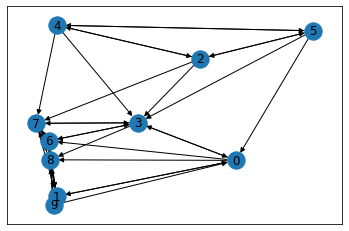

In [76]:
KGraph = ConstructKnnGraph(10, 4)
KGraph.KnnGraph()
KGraph.DrawGraph()

In [230]:
class PriorityQueueNode:
  def __init__(self, value, pr, pos, visited):
    self.data = value
    self.priority = pr
    self.pos = pos
    self.visited = visited
    self.next = None
         
# Implementation of Priority Queue
class PriorityQueue:
  def __init__(self):
    self.front = None
    self.queue_size = 0
         
  #Method to check Priority Queue is Empty
  #or not if Empty then it will return True
  #Otherwise False
  def isEmpty(self):
    return True if self.front == None else False 
  # Method to add items in Priority Queue
  # According to their priority value
  def push(self, value, priority):
    # Condition check for checking Priority
    # Queue is empty or not
    if self.isEmpty() == True:
      #print("init insert={},{}".format(value, priority))
      # Creating a new node and assigning
      # it to class variable
      self.front = PriorityQueueNode(value, priority, pos=0, visited=0)
      self.queue_size = self.queue_size + 1
      # Returning 1 for successful execution
      return 1, 0
    else:
      # Special condition check to see that
      # first node priority value
      if self.front.priority > priority:
        #print("insert ={},{} > {},{}".format(self.front.data, self.front.priority, value, priority))
        # Creating a new node
        pos = 0
        newNode = PriorityQueueNode(value, priority, pos=pos, visited=0)
        # Updating the new node next value
        newNode.next = self.front
                 
        # Assigning it to self.front
        self.front = newNode
        temp = self.front
        while temp.next:
          pos = temp.pos
          temp = temp.next
          temp.pos = pos + 1
        pos = self.queue_size
        self.queue_size = self.queue_size + 1
                 
        # Returning 1 for successful execution
        return 1, pos
                 
      else:
        # Traversing through Queue until it
        # finds the next smaller priority node
        #print("insert={},{} < {},{}".format(self.front.data, self.front.priority, value, priority))
        temp = self.front
        while temp.next:
          # If same priority node found then current
          # node will come after previous node
          if priority <= temp.next.priority:
            break
          temp = temp.next
        pos = temp.pos + 1
        newNode = PriorityQueueNode(value, priority, pos=pos, visited=0)
        newNode.next = temp.next
        temp.next = newNode
        while temp.next:
          temp_pos = temp.pos + 1
          temp = temp.next
          temp.pos = temp_pos
        self.queue_size = self.queue_size + 1
        # Returning 1 for successful execution
        return 1, pos
  # Method to remove high priority item
  # from the Priority Queue
  def pop(self): 
    # Condition check for checking
    # Priority Queue is empty or not
    if self.isEmpty() == True:
      return 
    else:
      # Removing high priority node from
      # Priority Queue, and updating front
      # with next node
      self.front = self.front.next
      return 1

  def pop_index(self, index):
    if self.isEmpty() == True:
      return 
    else:
      temp = self.front
      count = 0
      while count < index:
        temp = temp.next
        count = count + 1
      return temp.data

  def set_flag(self, vertex):
    if self.isEmpty() == True:
      return 
    else:
      temp = self.front
      while temp.data != vertex:
        temp = temp.next
      temp.visited = 1
    return 1
        

  def pop_flag(self):
    if self.isEmpty() == True:
      return 
    else:
      result = self.front
      if (self.front.next == None):
        return result.data
      temp = self.front.next
      while temp.visited == 1:
        temp = temp.next
      self.front = temp
      return result.data
             
  # Method to return high priority node
  # value Not removing it
  def peek(self):
    # Condition check for checking Priority
    # Queue is empty or not
    if self.isEmpty() == True:
      return
    else:
      return self.front.data    
  # Method to Traverse through Priority
  # Queue
  def traverse(self):
    # Condition check for checking Priority
    # Queue is empty or not
    if self.isEmpty() == True:
      return "Queue is Empty!"
    else:
      temp = self.front
      while temp:
        print("({}, {}, {})".format(temp.data, temp.pos, temp.visited))
        temp = temp.next

In [219]:
import sys
from bitarray import bitarray
MAX_PROP = sys.maxsize - 1
class GraphFramework:
  def __init__(self, inputGraph, query):
    self.G = inputGraph
    self.active_edges = []
    self.update = []
    self.vertex = self.G.nodes()
    self.initVertex = [2,6]
    self.BIT_MASK = 0x80000000
    self.query = query
    self.result_queue = PriorityQueue()
    self.bit_mask = bitarray(self.G.number_of_nodes())
  
  def preProcess(self):
    self.bit_mask.setall(0)
    self.bit_mask[4] = 1
    for v in self.initVertex:
      dist = np.linalg.norm(np.asarray(self.G.nodes[v]['pos']) - np.asarray(query))
      self.result_queue.push(v, dist)
      self.result_queue.set_flag(v)
      self.bit_mask[v] = 1

    for e in self.G.neighbors(self.result_queue.pop_flag()):
      if (self.bit_mask[e] == 0):
        self.active_edges.append(e)
      self.bit_mask[self.result_queue.peek()] = 1    
  
  def Scatter(self, dstProp):
    return np.linalg.norm(np.asarray(dstProp) - np.asarray(self.query)) #value
  
  def Gather(self):
    None
    

  def run(self):
    self.preProcess()
    for e in self.active_edges:
      dstProp = self.G.nodes[e]['pos']
      dist = self.Scatter(dstProp)
      self.update.append((e, dist))
    self.result_queue.traverse()
    for e,dist in self.update:
      print("update=({}, {})".format(e, dist))
      index = self.result_queue.push(e, dist)
      #print(index)
      self.result_queue.traverse()
      #index = self.result_queue.push()

6
9
2
1


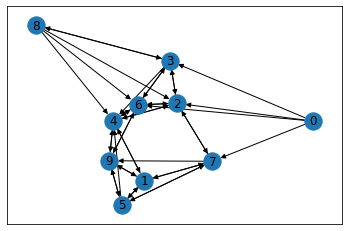

In [222]:
KGraph = ConstructKnnGraph(10, 4)
KGraph.KnnGraph()
for i in KGraph.G.neighbors(4):
  print(i)
KGraph.DrawGraph()

In [223]:
query = KGraph.G.nodes[4]['pos']
GraphSearch = GraphFramework(KGraph.G, query)
GraphSearch.run()

(6, 0, 0)
(2, 1, 0)
update=(3, 0.32670677094099626)
(6, 0, 0)
(2, 1, 0)
(3, 2, 0)
update=(9, 0.1852828482916024)
(6, 0, 0)
(9, 1, 0)
(2, 2, 0)
(3, 3, 0)


In [245]:
pq = PriorityQueue()
pq.push(9, 17)
pq.push(8, 16)
pq.push(7, 15)
pq.push(6, 14)
pq.push(5, 13)
pq.push(4, 12)
pq.push(3, 11)
pq.push(2, 10)
pq.traverse()

(2, 0, 0)
(3, 1, 0)
(4, 2, 0)
(5, 3, 0)
(6, 4, 0)
(7, 5, 0)
(8, 6, 0)
(9, 7, 0)


In [246]:
pq.set_flag(3)
pq.set_flag(6)
pq.set_flag(7)
pq.traverse()

print(pq.pop_flag())
print(pq.pop_flag())
print(pq.pop_flag())
pq.push(14, 2)
pq.push(13, 1)
pq.push(12, 0)
pq.traverse()
print(pq.pop_flag())
print(pq.pop_flag())
print(pq.pop_flag())

(2, 0, 0)
(3, 1, 1)
(4, 2, 0)
(5, 3, 0)
(6, 4, 1)
(7, 5, 1)
(8, 6, 0)
(9, 7, 0)
2
4
5
(12, 0, 0)
(13, 1, 0)
(14, 2, 0)
(8, 3, 0)
(9, 4, 0)
12
13
14
